In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

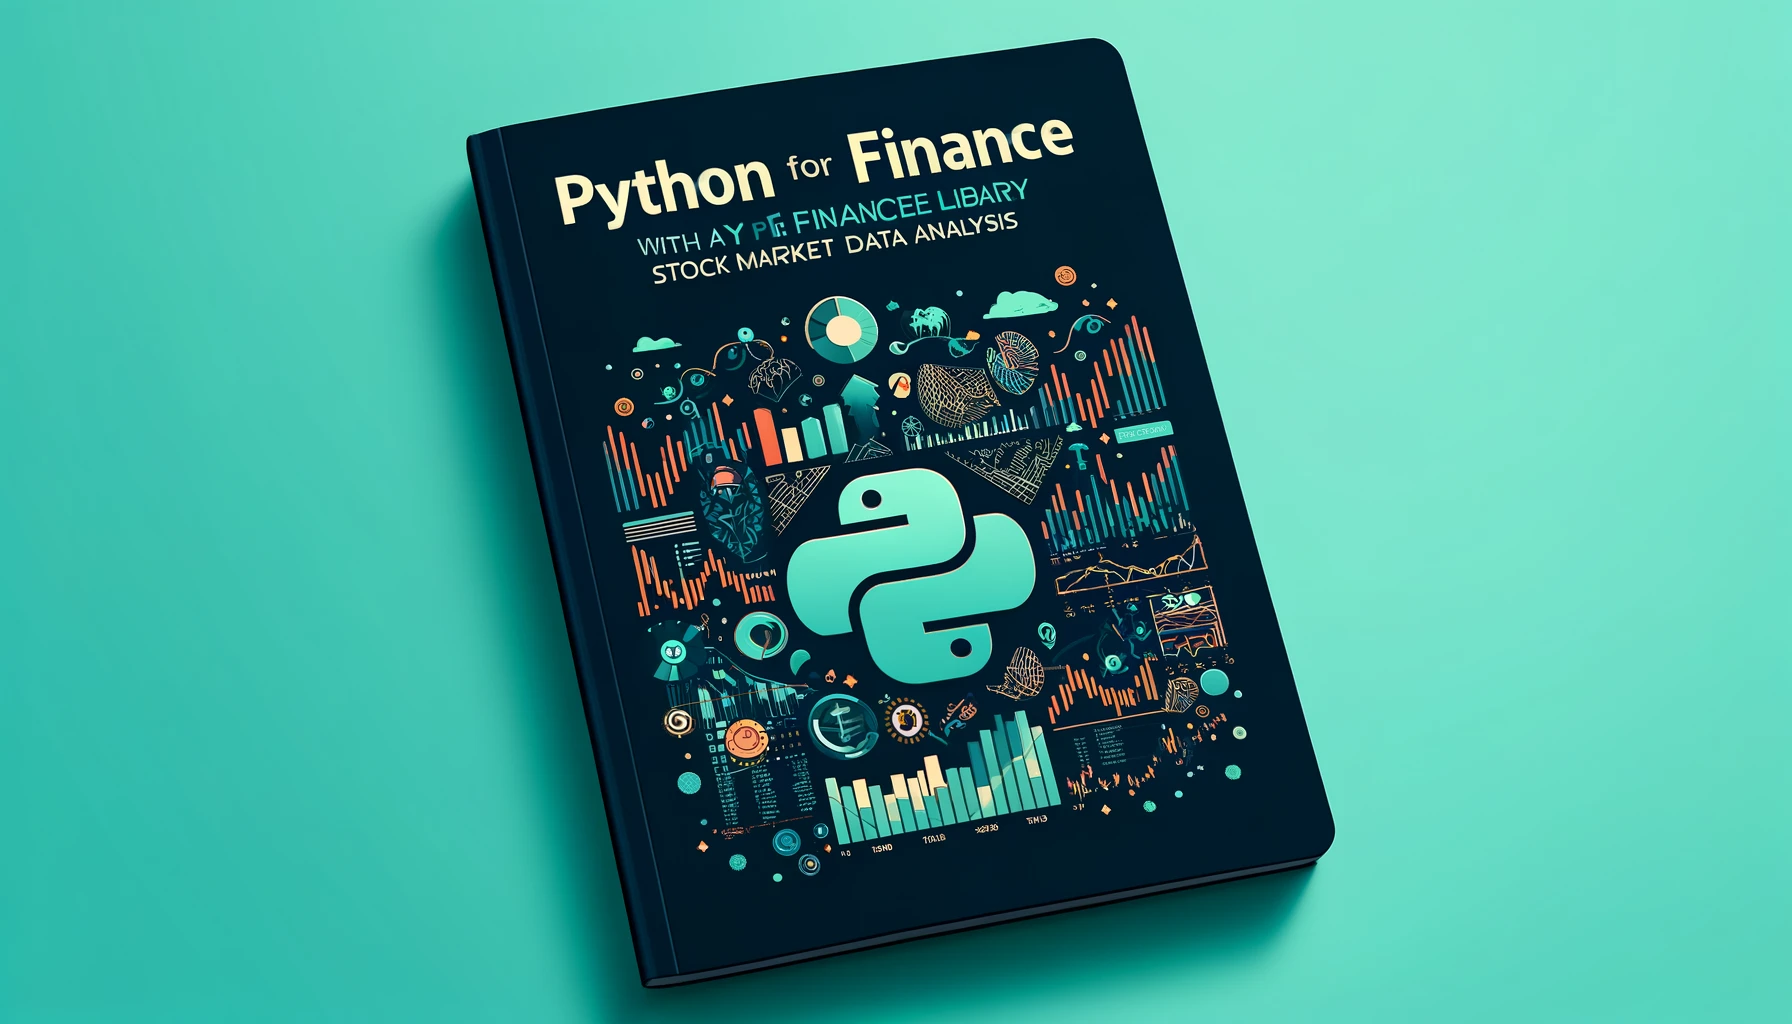

<div style="text-align: left;">
    <table>
        <tr>
            <th><b>Attribute</b></th>
            <th><b>Details</b></th>
        </tr>
        <tr>
            <td><b>Author</b></td>
            <td><b>Rizwan</b></td>
        </tr>
        <tr>
            <td>GitHub</td>
            <td><a href="https://github.com/Rizwankaka"><img src="https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github" alt="GitHub"/></a></td>
        </tr>
        <tr>
            <td>LinkedIn</td>
            <td><a href="https://www.linkedin.com/in/rizwan-rizwan-1351a650/"><img src="https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin" alt="LinkedIn"/></a></td>
        </tr>
        <tr>
            <td>Twitter</td>
            <td><a href="https://twitter.com/RizwanRizwan_"><img src="https://img.shields.io/badge/Twitter-Profile-blue?style=for-the-badge&logo=twitter" alt="Twitter"/></a></td>
        </tr>
        <tr>
            <td>Facebook</td>
            <td><a href="https://www.facebook.com/RIZWANNAZEEER"><img src="https://img.shields.io/badge/Facebook-Profile-blue?style=for-the-badge&logo=facebook" alt="Facebook"/></a></td>
        </tr>
        <tr>
            <td>Gmail</td>
            <td><a href="mailto:riwan.rewala@gmail.com"><img src="https://img.shields.io/badge/Gmail-Contact%20Me-red?style=for-the-badge&logo=gmail" alt="Gmail"/></a></td>
        </tr>
    </table>
</div>

#  ***1. Working with OHLC Data for Stocks***

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf 

> ***Retrieving financial information is also super easy. Simply pass as an argument of Ticker -> the ticker of the company. Below I am using Amazon as an example***

In [ ]:
Amazon = yf.Ticker('AMZN')
print(Amazon.info)

> ***The outcome of the print statement is Python dictionary, which we can parse in order to extract the desired financial data from Yahoo Finance.
For instance, let's extract a few financial key metrics.***

> ***All company information is contained under the info dictionary. Therefor, we can parse the dictionary to extract the elements that we are interested in:***

In [ ]:
Amazon = yf.Ticker('AMZN')

# 1) Company Sector
print(Amazon.info['sector'])

# 2) Price Earnings Ratio
print(Amazon.info['trailingPE'])

> ***There are so many other things available within info. We can see all of them by printing the keys of info:***

In [ ]:
print(Amazon.info.keys())

> ***Retrieving Historical Market Prices:
Moving on with other options offered by the library. We can also use it in order to download historical market data. 
In this notebook, I will get historical stock prices for Amazon covering the last few years. As shown below, it is rather simple task to do:***

In [ ]:
Amazon = yf.Ticker('AMZN')
print(Amazon.history(period = 'max'))

>***Since, we have specified period=max, we get the maximum number of daily prices available for amazon. You can also pass a lower range. The valid options are 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 3y, 5y, 10y and ytd.***

In [ ]:
# see another example, this time with TESLA
GetTesla = yf.Ticker('TSLA') # TSLA is a ticker for TESLA

# valid options are 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 3y, 5y, 10y and ytd.
print(GetTesla.history(period='6mo'))

# ***2. Plotting CandleStick Chart with Python***

### **Candlestick chart**:
are also known as a Japanese chart. These are widely used for technical analysis in trading as they visualize the price size within a period. They have four points Open, High, Low, Close **(OHLC)**. Candlestick charts can be created in python using a matplotlib module called **mplfinance**.

**Installation:**

pip install mplfinance

> **mplfinance.candlestick_ohlc()**

This function is used to plot **Candlestick charts**.

***Syntax:*** mplfinance.candlestick_ohlc(ax, quotes, width=0.2, colorup='k', colordown='r', alpha=1.0)

***Parameters:***

* ***ax:*** An Axes instance to plot to.
* ***quotes:*** sequence of (time, open, high, low, close, ...) sequences.
* ***width:*** Fraction of a day for the rectangle width.
* ***colorup:*** The color of the rectangle where close >= open.
* ***colordown:*** The color of the rectangle where close < open.
* ***alpha:*** (float) The rectangle alpha level.

***Returns***: returns(lines, patches) where lines are a list of lines added and pacthes is a list of the rectangle patches added.

In [ ]:
!pip install mplfinance

In [ ]:
# import required packages
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import pandas as pd
import matplotlib.dates as mpdates

plt.style.use('dark_background')

# extracting Data for plotting
df = pd.read_csv('/kaggle/input/reliance-ns/RELIANCE.NS_.csv')
df = df[['Date', 'Open', 'High', 'Low', 'Close']]

# convert into datetime object
df['Date'] = pd.to_datetime(df['Date'])

# apply map function
df['Date'] = df['Date'].map(mpdates.date2num)

# creating Subplots
fig, ax = plt.subplots()

# plotting the data 
candlestick_ohlc(ax, df.values, width =0.6, 
                colorup = 'green', colordown = 'red',
                alpha = 0.8)

# allow grid
ax.grid (True)

# setting labels 
ax.set_xlabel('Date')
ax.set_ylabel('Price')

# Formatting Date
date_format = mpdates.DateFormatter('%d -%m -%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()

# show the plot 
plt.show()

# ***3. Simple Moving Average (SMA) in python***

### **Simple Moving Average (SMA)**

A simple moving average tells us the unweighted mean of the previous K data points. The more the value of K the more smooth is the curve, but increasing K decreases accuracy. If the data points are p1, p2, . . . , pn then we calculate the simple moving average:

**SMAk = (pn-k+1 + pn-k+2 ⋅ ⋅ ⋅ + pn) / k**
**= 1/k * Σ(i=n-k+1 to n) pi**

> ***In Python, we can calculate the moving average using .rolling() method. This method provides rolling windows over the data, and we can use the mean function over these windows to calculate moving averages. The size of the window is passed as a parameter in the function .rolling(window).***

-> **Now let's see an example of how to calculate a simple rolling mean over a period of 30 days.**

## ***Step1: Importing libraries***

In [ ]:
# importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

## ***Step2: Importing data***

In [ ]:
# importing the time-series data 
reliance = pd.read_csv('/kaggle/input/reliance-ns/RELIANCE.NS_.csv', index_col = 'Date', parse_dates = True)
reliance.head()

## ***Step 3: Calculating SMA***

***To calculate SMA in Python we will use Pandas dataframe.rolling() function that helps us to make calculations on a rolling window. On the rolling window, we will use .mean() function to calculate the mean of each window.*** 

***Syntax: DataFrame.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0).mean()***

***Parameters :***
***window:*** Size of the window. That is how many observations we have to take for the calculation of each window.

***min_periods:*** Least number of observations in a window required to have a value (otherwise result is NA).

***center:*** It is used to set the labels at the center of the window.

***win_type:*** It is used to set the window type.

***on:*** Datetime column of our dataframe on which we have to calculate rolling mean.

***axis:*** ineger or string, default 0


In [ ]:
# updating our dataFrame to have only
# one column 'Close' as rest all columns
# are of no use for us at the moment
# using .to_frame() to convert pandas series
# into dataFrame.
reliance = reliance['Close'].to_frame()

# calculating simple moving average
# using .rolling(window).mean() ,
# with window size = 30
reliance['SMA30'] = reliance['Close'].rolling(30).mean() # moving average for 30 days

# removing all the NULL values using
# dropna() method
reliance.dropna(inplace=True)

# printing DataFrame
reliance

## ***Step4: Plotting Simple Moving Averages***

In [ ]:
# plotting close price and simple 
# moving average of 30 days using .plot() method
reliance[['Close', 'SMA30']].plot(label ='RELIANCE', figsize =(16,8))

# ***4. Exponential Moving Average (EMA)***

***Exponential moving average (EMA)*** tells us the weighted mean of the previous K data points. EMA places a greater weight and significance on the most recent data points. The formula to calculate EMA at the time period t is:

***EMA_t = {x_0            t = 0***

***{α.x_t + (1 - α)EMA_t-1 t > 0***

where x_t is the value of observation at time t & α is the smoothing factor. In python, EMA is calculated using .ewm() method. We can pass span or window as a parameter to .ewm(span =) method. 

***To calculate EMA in Python we use dataframe.ewm() function. It provides us exponentially weighted functions. We will be using .mean() function to calculate EMA.***

***Syntax: DataFrame.ewm(com=None, span=None, halflife=None, alpha=None, min_periods=0, adjust=True, ignore_na=False, axis=0, times=None).mean()***

***Parameters:***

***com: float, optional. It is the decay in terms of centre of mass.***

***span : float, optional . It is the decay in terms of span.***

***halflife : float, str, timedelta, optional . It is the decay in terms
of halflife.***

***alpha : float, optional . It is the smoothing factor having value
between 0 and 1, 1 inclusive.***

***min_periods : int, default 0. Least number of observations in a
window required to have a value (otherwise result is NA).***

***adjust : bool, default True . Divide by decaying adjustment
factor in beginning periods to account for imbalance in relative weighting (viewing EWMA as moving average***

***ignore_na: Ignore missing values when calculating weights; specify True to reproduce pre -0.15.0 behavior.***

***axis: The acis to use. The value 0 identifies the rows, and 1 identifies the columns***


In [ ]:
# Updating our dataframe to have only one column 'Close' as rest all columns are of no use for us at the moment
# Using to_frame() to convert pandas Series in the dataframe..
reliance = reliance['Close'].to_frame()

# calculating exponential moving average
# using.ewm(span).mean(), with window size = 30

reliance['EWMA30'] = reliance['Close'].ewm(span=30).mean()

# printing Dataframe
reliance

In [ ]:
# plotting Close price and exponential
# moving averages of 30 days
# using.plot() method

reliance[['Close', 'EWMA30']].plot(label='RELIANCE', figsize=(16, 8))

### **A Heartfelt Thank You**

As we close this chapter on educational journey through the intricacies of the stock market, I extend my sincerest gratitude for your time and engagement. You've navigated through the depths of data analysis using the yfinance library, mastering the art of interpreting candlestick charts, simple moving averages, and exponential moving averages—all brought to life with vivid visualizations.

It's my hope that this notebook serves not just as a guide but as a beacon for your continued learning and exploration in the world of finance. Should this collection of knowledge prove beneficial to you, I kindly ask for your comments to foster a community of shared insights. And, if you find merit in this work, an upvote to acknowledge its value would be greatly appreciated.

Warm regards,

***Rizwan***